In [6]:
from pandas.core.indexes.interval import IntervalIndex
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
df = pd.read_excel('superstore_sales.xlsx')

Data Auditing

In [3]:
dfdf.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [5]:
df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


In [7]:
df.shape

(51290, 21)

In [8]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [13]:
temp_df = pd.isnull(df )

In [14]:
temp_df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
df.isnull().sum() #checking missing values in the dataset

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

**Exploratory Data Analysis**

In [16]:
df['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [17]:
df['order_date'].max()

Timestamp('2014-12-31 00:00:00')

In [19]:
df['month_year'] = df['order_date'].dt.month

In [21]:
df.drop('month_year', axis = 1, inplace= True) #dropping a column

In [22]:
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m')) #adding a new column which contains information about 'month and year'

In [24]:
df['month_year']

0        2011-01
1        2011-01
2        2011-01
3        2011-01
4        2011-01
          ...   
51285    2014-12
51286    2014-12
51287    2014-12
51288    2014-12
51289    2014-12
Name: month_year, Length: 51290, dtype: object

In [25]:
df.groupby('month_year').sum()['sales'].reset_index()

,month_year,sales
0,2011-01,98898.48886
1,2011-02,91152.15698
2,2011-03,145729.36736
3,2011-04,116915.76418
4,2011-05,146747.83610
5,2011-06,215207.38022
6,2011-07,115510.41912
7,2011-08,207581.49122
8,2011-09,290214.45534
9,2011-10,199071.26404


In [26]:
df_trend = df.groupby('month_year').sum()['sales'].reset_index()

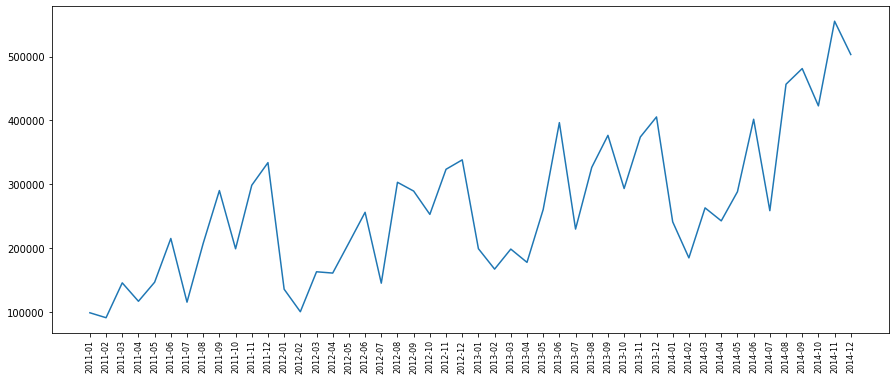

In [30]:
plt.figure(figsize= (15,6))
plt.xticks(rotation='vertical', size=8)
plt.plot(df_trend['month_year'], df_trend['sales'])

The sales are usually down during the inital 3-4 months of the year and then they pick up in the later part of the year. There is an upward trend in the sales.

**Q2. Which are the top 10 products by sales?**

In [31]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month_year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,2011-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,2011-01
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,2011-01
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011,2011-01
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011,2011-01


In [43]:
temp_df = df.groupby('product_name').sum().reset_index()

In [44]:
temp_df

,product_name,sales,quantity,discount,profit,shipping_cost,year
0,"""While you Were Out"" Message Book, One Form pe...",25.228,8,0.4,10.3880,3.10,6042
1,"#10 Gummed Flap White Envelopes, 100/Box",41.300,11,0.4,16.7678,2.09,8052
2,#10 Self-Seal White Envelopes,108.682,10,0.2,52.1230,11.43,8053
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904,32,0.4,223.1408,53.03,14088
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672,37,0.8,115.2806,34.95,20124
...,...,...,...,...,...,...,...
3783,iKross Bluetooth Portable Keyboard + Cell Phon...,477.660,24,0.4,115.6440,28.12,10064
3784,iOttie HLCRIO102 Car Mount,215.892,12,0.8,-11.9940,51.19,10062
3785,iOttie XL Car Mount,223.888,14,0.4,-50.3748,18.64,4028
3786,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,442.554,29,1.2,171.2648,40.78,14091


In [45]:
temp_df[temp_df['quantity'] == temp_df['quantity'].max()]

,product_name,sales,quantity,discount,profit,shipping_cost,year
3275,Staples,7008.2,876,21.2,2611.0694,731.43,456868


In [46]:
temp_df[temp_df['sales'] == temp_df['sales'].max()]

,product_name,sales,quantity,discount,profit,shipping_cost,year
310,"Apple Smart Phone, Full Size",86935.7786,171,5.44,5921.5786,8027.715,102654


In [47]:
temp_df[temp_df['profit'] == temp_df['profit'].max()]

,product_name,sales,quantity,discount,profit,shipping_cost,year
866,Canon imageCLASS 2200 Advanced Copier,61599.824,20,0.6,25199.928,1276.32054,10068


In [52]:
temp_df = temp_df.sort_values('sales', ascending= False) #sorting the dataframe in descending order of sales values

In [53]:
temp_df[:10] 

,product_name,sales,quantity,discount,profit,shipping_cost,year
310,"Apple Smart Phone, Full Size",86935.7786,171,5.44,5921.5786,8027.71500,102654
970,"Cisco Smart Phone, Full Size",76441.5306,139,2.07,17238.5206,7065.16600,76495
2415,"Motorola Smart Phone, Full Size",73156.3030,134,5.61,17027.1130,8817.33100,76498
2501,"Nokia Smart Phone, Full Size",71904.5555,147,6.79,9938.1955,7852.66300,94594
866,Canon imageCLASS 2200 Advanced Copier,61599.8240,20,0.60,25199.9280,1276.32054,10068
1837,"Hon Executive Leather Armchair, Adjustable",58193.4841,169,8.11,5997.2541,5751.54100,98638
2631,"Office Star Executive Leather Armchair, Adjust...",50661.6840,141,6.47,4710.9840,5141.73400,90577
1714,"Harbour Creations Executive Leather Armchair, ...",50121.5160,142,6.98,10427.3260,6548.16500,78499
2988,"Samsung Smart Phone, Cordless",48653.4600,108,3.26,-198.0900,5892.07400,52319
2502,"Nokia Smart Phone, with Caller ID",47877.7857,96,3.54,9465.3257,5321.11000,48301


**Q3. Which Products have sold the most?**

In [54]:
temp_df = temp_df.sort_values('quantity', ascending = False)

In [55]:
temp_df[:10]

,product_name,sales,quantity,discount,profit,shipping_cost,year
3275,Staples,7008.2000,876,21.20,2611.0694,731.430,456868
894,"Cardinal Index Tab, Clear",1922.8302,337,10.32,556.3702,208.345,185186
1210,"Eldon File Cart, Single Width",34387.7287,321,8.82,4238.8887,3970.841,181155
2840,"Rogers File Cart, Single Width",29466.3053,262,16.26,2394.8953,3136.280,169085
3070,"Sanford Pencil Sharpener, Water Color",5581.9741,259,10.66,601.9441,570.373,161008
3335,"Stockwell Paper Clips, Assorted Sizes",2395.4378,253,9.86,251.2878,269.211,130844
446,"Avery Index Tab, Clear",1312.9488,252,9.01,221.5388,140.505,148956
1981,"Ibico Index Tab, Clear",1807.1811,251,10.71,125.6411,193.248,167045
3179,"Smead File Cart, Single Width",25397.1708,250,13.06,-237.6692,3036.454,154992
3266,"Stanley Pencil Sharpener, Water Color",5537.2290,242,5.57,125.5390,520.203,150966


Highest selling proiducts by quantity are mostly stationary products.

**Q4. What is the most preferred Shipping Mode?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


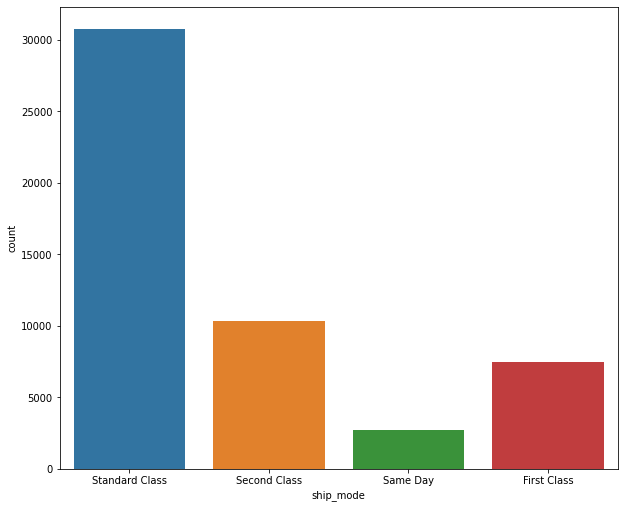

In [58]:
plt.figure(figsize=(10,8.5))
sns.countplot(df['ship_mode'])
plt.show()

**As we can see, Standard Class is the most preferred Shipping Mode**

**Q5. Which is the Most Profitable Category and Sub-Category?**

In [62]:
#Grouping category and sub-category
temp_df_cat = pd.DataFrame(df.groupby(['category', 'sub_category']).sum()['profit']) #groupby using two features

In [63]:
#sorting the result
temp_df_cat.sort_values(['category', 'profit'], ascending=False)

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870